In [1]:
from google.colab import drive
import tarfile
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from keras.utils import np_utils
drive.mount('/content/drive'),

Mounted at /content/drive


(None,)

In [2]:
data_path = '/content/drive/MyDrive/facial_expression/jaffe'
data_dir_list = os.listdir(data_path)

img_si=128
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(img_si,img_si))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-HAPPY

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:58]=1 #29
labels[59:90]=2 #32
labels[91:121]=3 #31
labels[122:151]=4 #30
labels[152:182]=5 #31
labels[183:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [4]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test
#X_train=X_train.reshape(X_train.shape[0],128,128,1)
#X_test=X_test.reshape(X_test.shape[0],128,128,1)
x_test.shape

(43, 128, 128, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [6]:
input_shape=(img_si,img_si,3)

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model1.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation = 'softmax'))

In [7]:
input_shape=(img_si,img_si,3)

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model4.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model4.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation = 'softmax'))

In [8]:
input_shape=(img_si,img_si,3)

model16 = Sequential()
model16.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model16.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model16.add(Dropout(0.25))
model16.add(MaxPooling2D(pool_size=(2, 2)))

model16.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model16.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model16.add(Dropout(0.25))
model16.add(MaxPooling2D(pool_size=(2, 2)))

model16.add(Flatten())
model16.add(Dense(64, activation = 'relu'))
model16.add(Dense(64, activation = 'relu'))
model16.add(Dense(64, activation = 'relu'))
model16.add(Dropout(0.5))
model16.add(Dense(7, activation = 'softmax'))

In [9]:
input_shape=(img_si,img_si,3)

model32 = Sequential()
model32.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model32.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model32.add(Dropout(0.25))
model32.add(MaxPooling2D(pool_size=(2, 2)))

model32.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model32.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model32.add(Dropout(0.25))
model32.add(MaxPooling2D(pool_size=(2, 2)))

model32.add(Flatten())
model32.add(Dense(64, activation = 'relu'))
model32.add(Dense(64, activation = 'relu'))
model32.add(Dense(64, activation = 'relu'))
model32.add(Dense(64, activation = 'relu'))
model32.add(Dense(64, activation = 'relu'))
model32.add(Dropout(0.5))
model32.add(Dense(7, activation = 'softmax'))

In [10]:
input_shape=(img_si,img_si,3)

model64 = Sequential()
model64.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model64.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
model64.add(Dropout(0.25))
model64.add(MaxPooling2D(pool_size=(2, 2)))

model64.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model64.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model64.add(Dropout(0.25))
model64.add(MaxPooling2D(pool_size=(2, 2)))

model64.add(Flatten())
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dense(64, activation = 'relu'))
model64.add(Dropout(0.5))
model64.add(Dense(7, activation = 'softmax'))

In [11]:
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [12]:
model4.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [13]:
model16.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [14]:
model32.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [15]:
model64.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [16]:
from keras import callbacks
filename1='model1_train_new.csv'
filename4='model4_train_new.csv'
filename16='model16_train_new.csv'
filename32='model32_train_new.csv'
filename64='model64_train_new.csv'

filepath1 = os.path.join('checkpoint', filename1)
filepath4 = os.path.join('checkpoint', filename4)
filepath16 = os.path.join('checkpoint', filename16)
filepath32 = os.path.join('checkpoint', filename32)
filepath64 = os.path.join('checkpoint', filename64)

checkpoint1 = callbacks.ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint4 = callbacks.ModelCheckpoint(filepath4, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint16 = callbacks.ModelCheckpoint(filepath16, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint32 = callbacks.ModelCheckpoint(filepath32, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint64 = callbacks.ModelCheckpoint(filepath64, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')


In [17]:
hist1 = model1.fit(X_train, y_train, batch_size=7, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint1)

Epoch 1/20
25/25 [==============================] - 45s 51ms/step - loss: 2.2435 - accuracy: 0.1297 - val_loss: 1.9467 - val_accuracy: 0.1163

Epoch 00001: val_accuracy improved from -inf to 0.11628, saving model to checkpoint/model1_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1_train_new.csv/assets
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9455 - accuracy: 0.1800 - val_loss: 1.9482 - val_accuracy: 0.1163

Epoch 00002: val_accuracy did not improve from 0.11628
Epoch 3/20
25/25 [==============================] - 0s 13ms/step - loss: 1.9458 - accuracy: 0.1189 - val_loss: 1.9493 - val_accuracy: 0.0465

Epoch 00003: val_accuracy did not improve from 0.11628
Epoch 4/20
25/25 [==============================] - 0s 13ms/step - loss: 1.9450 - accuracy: 0.1824 - val_loss: 1.9514 - val_accuracy: 0.0465

Epoch 00004: val_accuracy did not improve from 0.11628
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9440 - accur

In [18]:
hist4 = model4.fit(X_train, y_train, batch_size=7, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint4)

Epoch 1/20
25/25 [==============================] - 2s 35ms/step - loss: 2.1715 - accuracy: 0.2526 - val_loss: 1.9471 - val_accuracy: 0.2093

Epoch 00001: val_accuracy improved from -inf to 0.20930, saving model to checkpoint/model4_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4_train_new.csv/assets
Epoch 2/20
25/25 [==============================] - 0s 15ms/step - loss: 1.9468 - accuracy: 0.1439 - val_loss: 1.9481 - val_accuracy: 0.2093

Epoch 00002: val_accuracy did not improve from 0.20930
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9477 - accuracy: 0.1691 - val_loss: 1.9502 - val_accuracy: 0.0465

Epoch 00003: val_accuracy did not improve from 0.20930
Epoch 4/20
25/25 [==============================] - 0s 13ms/step - loss: 1.9438 - accuracy: 0.2097 - val_loss: 1.9577 - val_accuracy: 0.1163

Epoch 00004: val_accuracy did not improve from 0.20930
Epoch 5/20
25/25 [==============================] - 0s 13ms/step - loss: 1.9969 - accura

In [19]:
hist16 = model16.fit(X_train, y_train, batch_size=7, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint16)

Epoch 1/20
25/25 [==============================] - 2s 30ms/step - loss: 2.3659 - accuracy: 0.1958 - val_loss: 1.9445 - val_accuracy: 0.1163

Epoch 00001: val_accuracy improved from -inf to 0.11628, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 2/20
25/25 [==============================] - 0s 16ms/step - loss: 1.9662 - accuracy: 0.1306 - val_loss: 1.9501 - val_accuracy: 0.0930

Epoch 00002: val_accuracy did not improve from 0.11628
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9471 - accuracy: 0.1847 - val_loss: 1.9541 - val_accuracy: 0.0930

Epoch 00003: val_accuracy did not improve from 0.11628
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9482 - accuracy: 0.0911 - val_loss: 1.9561 - val_accuracy: 0.0930

Epoch 00004: val_accuracy did not improve from 0.11628
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9417 - accu

In [20]:
hist32 = model32.fit(X_train, y_train, batch_size=7, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint32)

Epoch 1/20
22/25 [=========================>....] - ETA: 0s - loss: 1.9905 - accuracy: 0.1346

Exception ignored in: <function CapturableResource.__del__ at 0x7f6018a5c290>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/tracking.py", line 264, in __del__
    def __del__(self):
KeyboardInterrupt


25/25 [==============================] - 2s 43ms/step - loss: 1.9883 - accuracy: 0.1351 - val_loss: 1.9473 - val_accuracy: 0.0465

Epoch 00001: val_accuracy improved from -inf to 0.04651, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 2/20
25/25 [==============================] - 0s 17ms/step - loss: 1.9469 - accuracy: 0.1394 - val_loss: 1.9518 - val_accuracy: 0.0465

Epoch 00002: val_accuracy did not improve from 0.04651
Epoch 3/20
25/25 [==============================] - 0s 14ms/step - loss: 1.9449 - accuracy: 0.0890 - val_loss: 1.9581 - val_accuracy: 0.0465

Epoch 00003: val_accuracy did not improve from 0.04651
Epoch 4/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9450 - accuracy: 0.1541 - val_loss: 1.9570 - val_accuracy: 0.0465

Epoch 00004: val_accuracy did not improve from 0.04651
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 1.9461 - accuracy: 0.119

In [21]:
hist64 = model64.fit(X_train, y_train, batch_size=7, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=checkpoint64)

Epoch 1/20
25/25 [==============================] - 3s 42ms/step - loss: 1.9585 - accuracy: 0.1490 - val_loss: 1.9692 - val_accuracy: 0.0465

Epoch 00001: val_accuracy improved from -inf to 0.04651, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 2/20
25/25 [==============================] - 0s 16ms/step - loss: 1.9528 - accuracy: 0.1218 - val_loss: 1.9587 - val_accuracy: 0.0698

Epoch 00002: val_accuracy improved from 0.04651 to 0.06977, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 3/20
25/25 [==============================] - 0s 17ms/step - loss: 1.9470 - accuracy: 0.1517 - val_loss: 1.9630 - val_accuracy: 0.0930

Epoch 00003: val_accuracy improved from 0.06977 to 0.09302, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 4/20
25/25 [=======

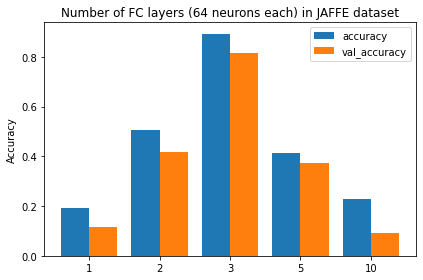

In [22]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['1','2', '3', '5', '10']
accuracy = [np.amax(hist1.history['accuracy']),
            np.amax(hist4.history['accuracy']),
             np.amax(hist16.history['accuracy']),
             np.amax(hist32.history['accuracy']),
             np.amax(hist64.history['accuracy'])]
                       
val_accuracy = [np.amax(hist1.history['val_accuracy']),
                np.amax(hist4.history['val_accuracy']),
             np.amax(hist16.history['val_accuracy']),
             np.amax(hist32.history['val_accuracy']),
             np.amax(hist64.history['val_accuracy'])]

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='val_accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of FC layers (64 neurons each) in JAFFE dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()